# 📊 Football Data Analysis
This notebook presents an in-depth analysis of football player performance data across different leagues and seasons. We use Python libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn` for data manipulation and visualization.

## 🧾 Dataset Overview
We begin by exploring the dataset structure, understanding the different features (columns), and checking basic statistics.

# Football Stats Data Analysis

This notebook provides an exploratory data analysis (EDA) of player statistics from La Liga.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("Data.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


## Data Quality Check

In [7]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
# Data types
print("\nData Types:\n", df.dtypes)

Missing Values:
 Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

Data Types:
 Country                     object
League                      object
Club                        object
Player Names                object
Matches_Played               int64
Substitution                 int64
Mins                         int64
Goals                        int64
xG                         float64
xG Per Avg Match           float64
Shots                        int64
OnTarget                     int64
Shots Per Avg Match        float64
On Target Per Avg Match    float64
Year            

## Summary Statistics

In [9]:
df.describe(include='all')

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660,660,626,660,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
unique,9,28,179,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Spain,La Liga,(PSG),Andrea Belotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,14,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,NaN,NaN,NaN,NaN,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,NaN,NaN,NaN,NaN,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,NaN,NaN,NaN,NaN,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,NaN,NaN,NaN,NaN,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,NaN,NaN,NaN,NaN,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000


## Correlation Matrix

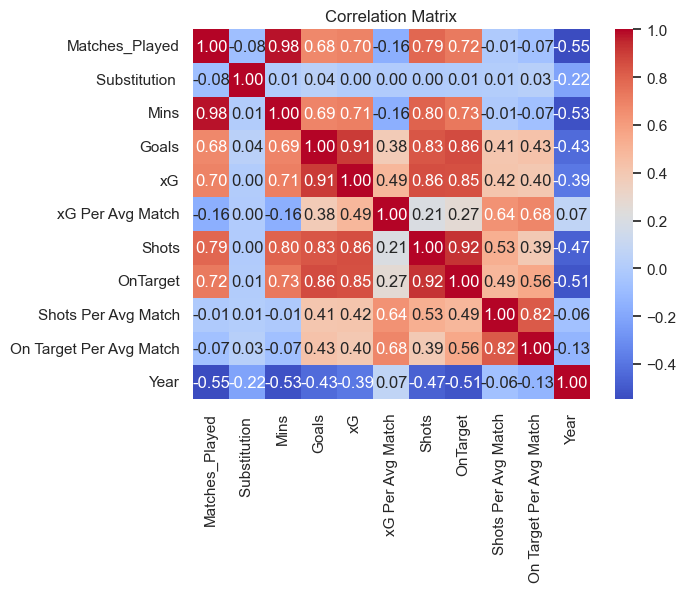

In [11]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Goals vs Expected Goals (xG)

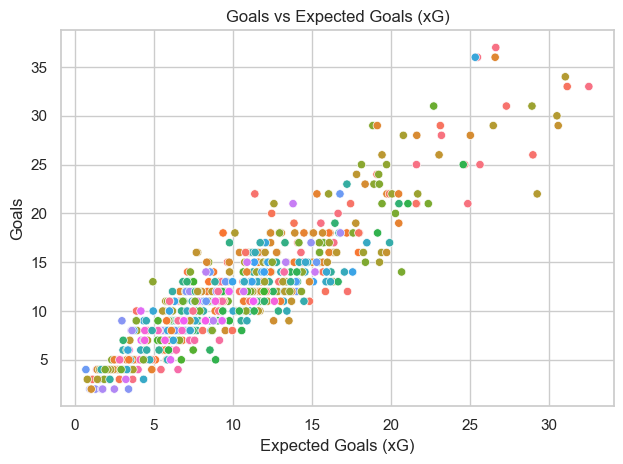

In [13]:
sns.scatterplot(data=df, x='xG', y='Goals', hue='Club', legend=False)
plt.title("Goals vs Expected Goals (xG)")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Goals")
plt.tight_layout()
plt.show()

## Distribution of Goals

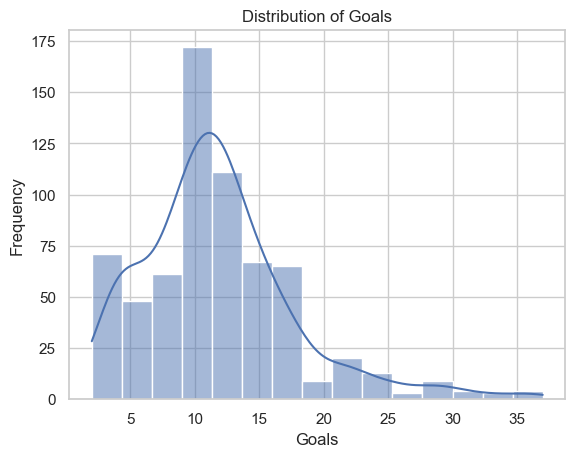

In [15]:
sns.histplot(df['Goals'], bins=15, kde=True)
plt.title("Distribution of Goals")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

## Top 10 Players by Goals

/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/3134472718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_goals, x='Goals', y='Player Names', palette='viridis')


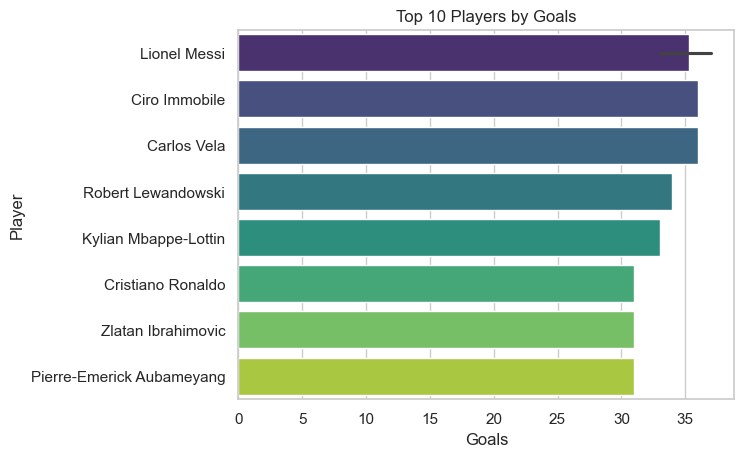

In [17]:
top_goals = df.sort_values(by='Goals', ascending=False).head(10)
sns.barplot(data=top_goals, x='Goals', y='Player Names', palette='viridis')
plt.title("Top 10 Players by Goals")
plt.xlabel("Goals")
plt.ylabel("Player")
plt.show()

In [18]:
# Summary stats
display(df.describe())

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


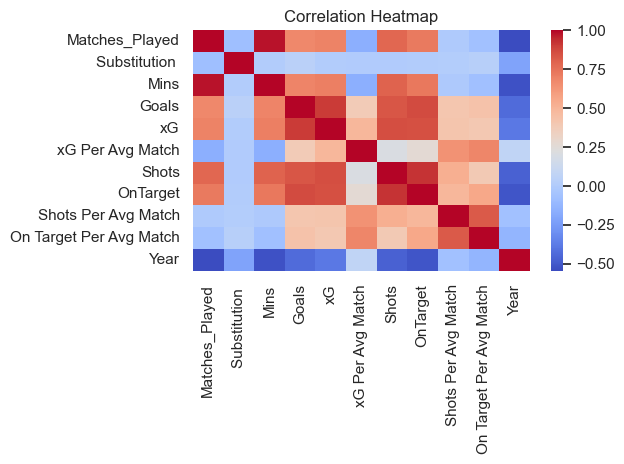

In [19]:
# Correlation heatmap
plt.figure()
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

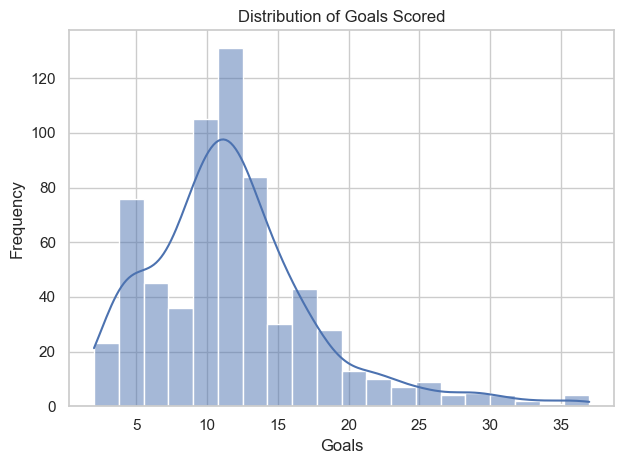

In [20]:
# Goals distribution
plt.figure()
sns.histplot(df['Goals'], bins=20, kde=True)
plt.title("Distribution of Goals Scored")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

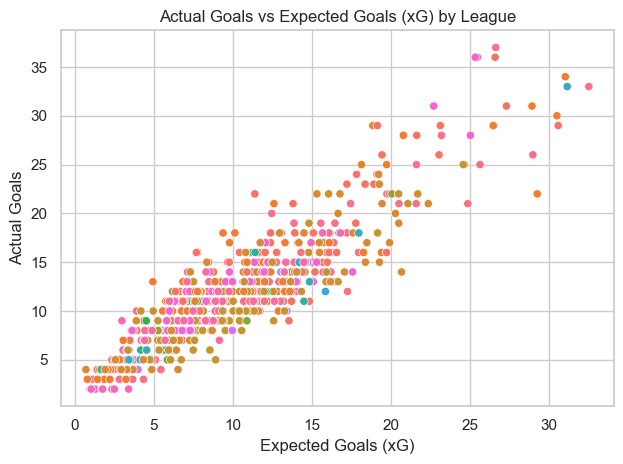

In [21]:
# xG vs Goals
plt.figure()
sns.scatterplot(x='xG', y='Goals', hue='League', data=df, legend=False)
plt.title("Actual Goals vs Expected Goals (xG) by League")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals")
plt.tight_layout()
plt.show()


/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/173909152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals', y='Player Names', data=top_scorers, palette="viridis")


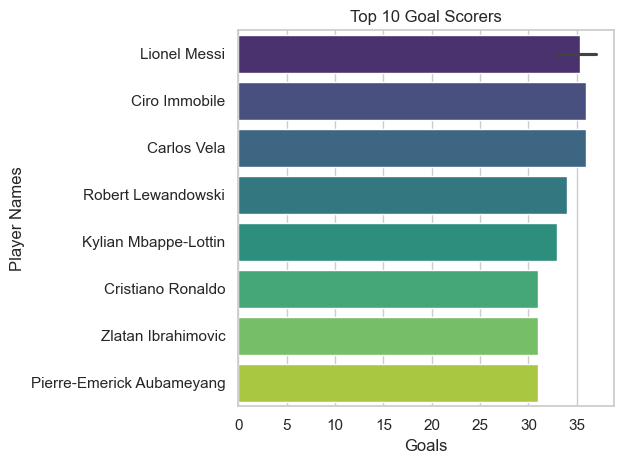

In [22]:
# Top 10 scorers
top_scorers = df.sort_values(by='Goals', ascending=False).head(10)
plt.figure()
sns.barplot(x='Goals', y='Player Names', data=top_scorers, palette="viridis")
plt.title("Top 10 Goal Scorers")
plt.xlabel("Goals")
plt.ylabel("Player Names")
plt.tight_layout()
plt.show()

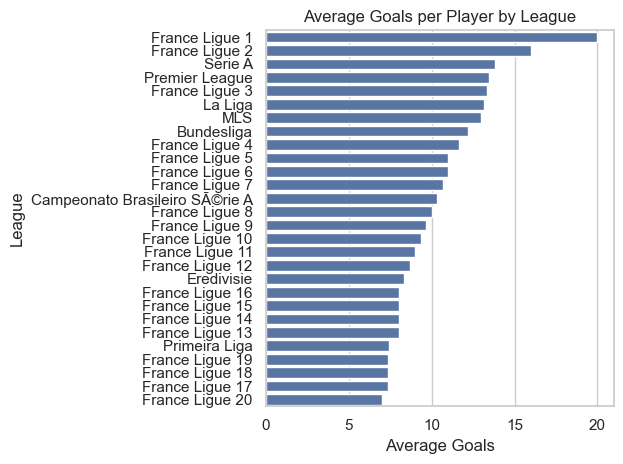

In [23]:
# League-wise goal average
league_summary = df.groupby('League')['Goals'].mean().sort_values(ascending=False).reset_index()
plt.figure()
sns.barplot(x='Goals', y='League', data=league_summary)
plt.title("Average Goals per Player by League")
plt.xlabel("Average Goals")
plt.ylabel("League")
plt.tight_layout()
plt.show()

## ⚙️ Goal Efficiency
We analyze player efficiency by calculating `Goals per Minute Played` to identify who makes the most of their time on the field.

In [25]:
# Efficiency: Goals per minute
df['Goals_per_Min'] = df['Goals'] / df['Mins']
most_efficient_scorers = df[df['Mins'] > 500].sort_values(by='Goals_per_Min', ascending=False).head(10)

## 📈 Overperformers vs Underperformers
By computing the difference between actual goals and expected goals (xG), we highlight players who consistently exceed expectations, and those who underdeliver.

In [27]:
# Over- and under-performance
df['xG_Diff'] = df['Goals'] - df['xG']
top_overperformers = df.sort_values(by='xG_Diff', ascending=False).head(10)
top_underperformers = df.sort_values(by='xG_Diff').head(10)


## 🎯 Shooting Accuracy
We calculate the shooting accuracy (On Target / Shots) to find the most precise shooters among players with a significant number of attempts.

In [29]:
# Shot accuracy
df['Accuracy'] = df['OnTarget'] / df['Shots']
most_accurate_shooters = df[df['Shots'] > 30].sort_values(by='Accuracy', ascending=False).head(10)

/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/1593771849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_efficient_scorers, x='Goals_per_Min', y='Player Names', palette='crest')


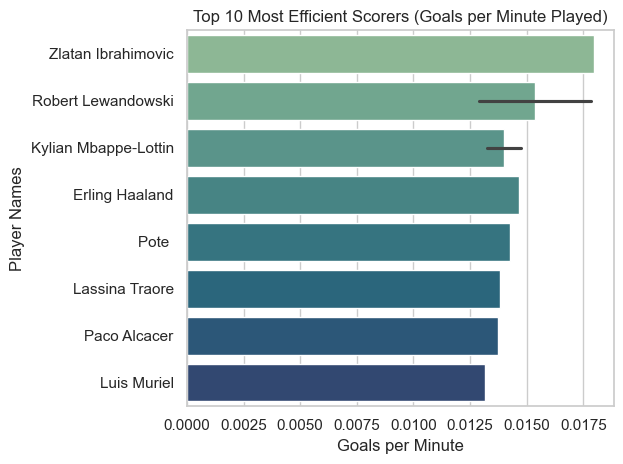

In [30]:
plt.figure()
sns.barplot(data=most_efficient_scorers, x='Goals_per_Min', y='Player Names', palette='crest')
plt.title("Top 10 Most Efficient Scorers (Goals per Minute Played)")
plt.xlabel("Goals per Minute")
plt.tight_layout()
plt.show()

/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/814862146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overperformers, x='xG_Diff', y='Player Names', palette='Greens')


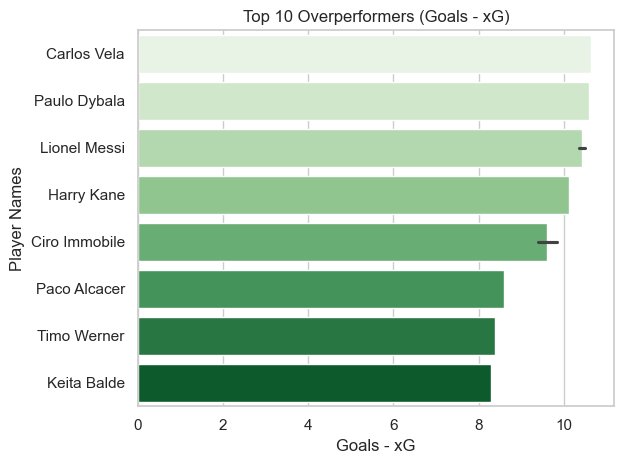

In [31]:
plt.figure()
sns.barplot(data=top_overperformers, x='xG_Diff', y='Player Names', palette='Greens')
plt.title("Top 10 Overperformers (Goals - xG)")
plt.xlabel("Goals - xG")
plt.tight_layout()
plt.show()

/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/866293925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_underperformers, x='xG_Diff', y='Player Names', palette='Reds_r')


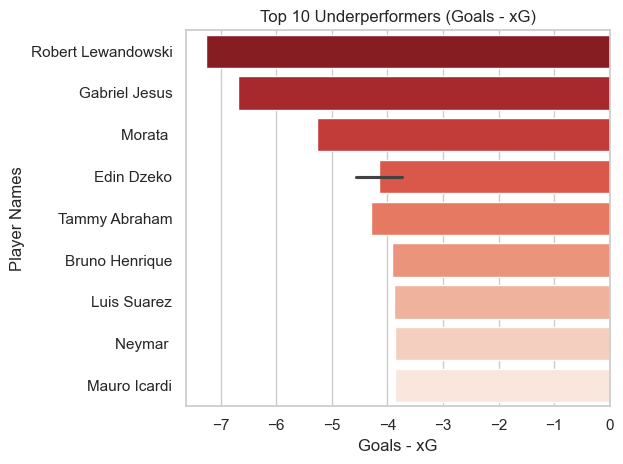

In [32]:
plt.figure()
sns.barplot(data=top_underperformers, x='xG_Diff', y='Player Names', palette='Reds_r')
plt.title("Top 10 Underperformers (Goals - xG)")
plt.xlabel("Goals - xG")
plt.tight_layout()
plt.show()

/var/folders/y8/qllwp7897pzg2p2bcmrz526h0000gn/T/ipykernel_6010/83530127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_accurate_shooters, x='Accuracy', y='Player Names', palette='Purples')


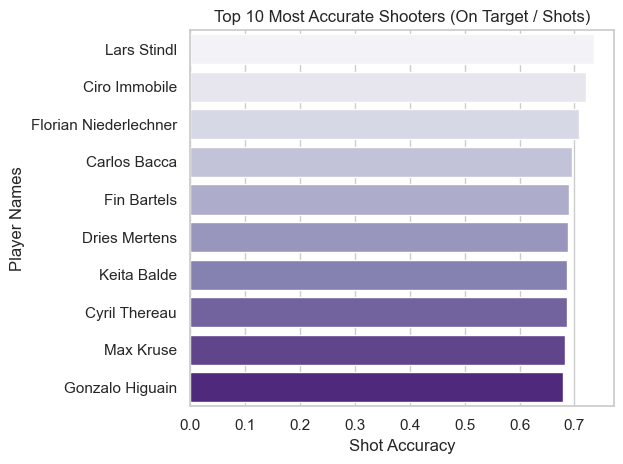

In [33]:
plt.figure()
sns.barplot(data=most_accurate_shooters, x='Accuracy', y='Player Names', palette='Purples')
plt.title("Top 10 Most Accurate Shooters (On Target / Shots)")
plt.xlabel("Shot Accuracy")
plt.tight_layout()
plt.show()

### 🔝 Clubs with Most High-Performing Scorers
Shows clubs with the most players scoring more than 15 goals.

In [35]:
# Clubs with most high scorers
high_performers = df[df['Goals'] > 15]
top_clubs_by_scorers = high_performers['Club'].value_counts().head(10)
print("Top Clubs by High Scorers:\n", top_clubs_by_scorers)

Top Clubs by High Scorers:
 Club
(BAR)    6
(NAP)    6
(TOT)    6
(JUV)    5
(ATA)    5
(ATL)    5
(MNC)    5
(RMA)    5
(LIV)    4
(PSG)    4
Name: count, dtype: int64


### 🌍 Country Efficiency (Goals vs Expected Goals)
Ranks countries by their players' goal-scoring efficiency.

In [37]:
# Country-wise average goal efficiency
country_efficiency = df.groupby('Country')[['Goals', 'xG']].mean()
country_efficiency['Efficiency'] = country_efficiency['Goals'] / country_efficiency['xG']
country_efficiency = country_efficiency.sort_values(by='Efficiency', ascending=False)
print("\nCountry Efficiency (Goals / xG):\n", country_efficiency.head(10))


Country Efficiency (Goals / xG):
                   Goals         xG  Efficiency
Country                                       
Portugal       7.450000   5.614500    1.326921
 Netherlands   8.300000   6.412000    1.294448
USA           12.975000  10.411250    1.246248
Italy         13.820000  11.413800    1.210815
Germany       12.180000  10.121300    1.203403
France        10.066667   8.658500    1.162634
England       13.475000  11.736875    1.148091
Spain         13.140000  11.988400    1.096060
Brazil        10.330000   9.508200    1.086431


### 📊 Goal Variability by League
Highlights leagues with the most variation in goal output.

In [39]:
# Variability in goals per league
league_variability = df.groupby('League')['Goals'].std().sort_values(ascending=False)
print("\nStandard Deviation of Goals by League:\n", league_variability.head(10))


Standard Deviation of Goals by League:
 League
France Ligue 1    12.124356
France Ligue 2     7.211103
La Liga            6.894618
Serie A            6.849582
France Ligue 3     6.429101
MLS                6.040409
Bundesliga         5.992217
Premier League     5.791690
France Ligue 4     5.131601
France Ligue 7     5.131601
Name: Goals, dtype: float64


### 🚀 Most Impactful Players (Per Match Contribution)
Identifies players who contribute most to matches via goals and shots on target.

In [41]:
# Goal contribution per match
df['Goal_Impact'] = (df['Goals'] + df['OnTarget']) / df['Matches_Played']
impactful_players = df[df['Matches_Played'] > 10].sort_values(by='Goal_Impact', ascending=False).head(10)
print("\nMost Impactful Players:\n", impactful_players[['Player Names', 'Goal_Impact']])



Most Impactful Players:
              Player Names  Goal_Impact
24          Dries Mertens     4.642857
251  Kylian Mbappe-Lottin     4.291667
195          Lionel Messi     4.241379
228          Paco Alcacer     4.090909
107          Lionel Messi     4.000000
438  Kylian Mbappe-Lottin     3.941176
32             Edin Dzeko     3.878788
112     Cristiano Ronaldo     3.777778
46     Robert Lewandowski     3.741935
37        Gonzalo Higuain     3.593750


### ⏱️ Minutes Played vs Efficiency
Looks at the most used players and compares their scoring efficiency.

In [43]:
# Most played and efficient scorers
top_minutes_players = df.sort_values(by='Mins', ascending=False).head(10)[['Player Names', 'Mins', 'Goals', 'xG', 'Goals_per_Min']]
print("\nTop Players by Minutes Played and Efficiency:\n", top_minutes_players)



Top Players by Minutes Played and Efficiency:
          Player Names  Mins  Goals     xG  Goals_per_Min
291       Diego Souza  4177     11  11.43       0.002633
293        Nico Lupez  3931     11   8.69       0.002798
260  Luka Milivojevic  3651     12  11.15       0.003287
212  Francesco Caputo  3641     16  16.10       0.004394
114     Gerard Moreno  3555     16  17.96       0.004501
242      Nicolas Pepe  3533     22  20.08       0.006227
205    Andrea Belotti  3533     15  15.99       0.004246
73      Jermain Defoe  3511     15  15.52       0.004272
132      Ivan Perisic  3491     11   9.19       0.003151
339        Iago Aspas  3474     14  15.72       0.004030


### 🧮 Most Consistent Scorers
Identifies players with the lowest standard deviation in goals per match, indicating consistent performance.

In [45]:
# Most consistent scorers by lowest std deviation in goals per match
df['Goals_per_Match'] = df['Goals'] / df['Matches_Played']
consistent_players = df[df['Matches_Played'] > 10].copy()
consistent_players_std = consistent_players.groupby('Player Names')['Goals_per_Match'].std().dropna().sort_values().head(10)
print("Most Consistent Scorers (Lowest Std Dev):\n", consistent_players_std)


Most Consistent Scorers (Lowest Std Dev):
 Player Names
Luiz Fernando       0.000000
Carlos Bacca        0.000000
Romelu Lukaku       0.001786
Jonathan Bamba      0.005510
Wout Weghorst       0.012856
Marco Reus          0.013095
Fred                0.014285
Willian Jose        0.014892
Cristhian Stuani    0.016205
Serge Gnabry        0.019285
Name: Goals_per_Match, dtype: float64


### 🚀 Players Exceeding League Averages
Highlights players who outperformed their league's average goals significantly.

In [47]:
# Outliers above league average
league_avg_goals = df.groupby('League')['Goals'].mean()
df['League_Avg_Goals'] = df['League'].map(league_avg_goals)
df['Above_League_Avg'] = df['Goals'] - df['League_Avg_Goals']
top_outliers = df.sort_values(by='Above_League_Avg', ascending=False).head(10)
print("\nTop Players Exceeding League Avg:\n", top_outliers[['Player Names', 'Goals', 'League', 'Above_League_Avg']])



Top Players Exceeding League Avg:
                   Player Names  Goals      League  Above_League_Avg
12                Lionel Messi     37     La Liga            23.860
317                Carlos Vela     36         MLS            23.025
195               Lionel Messi     36     La Liga            22.860
391              Ciro Immobile     36     Serie A            22.180
408         Robert Lewandowski     34  Bundesliga            21.820
107               Lionel Messi     33     La Liga            19.860
54   Pierre-Emerick Aubameyang     31  Bundesliga            18.820
302         Zlatan Ibrahimovic     31         MLS            18.025
46          Robert Lewandowski     30  Bundesliga            17.820
385          Cristiano Ronaldo     31     Serie A            17.180


### 🏟️ Clubs with the Highest Average xG per Player
Finds clubs whose players consistently generate high expected goal values.

In [49]:
# Clubs with highest average xG
club_xg_avg = df.groupby('Club')['xG'].mean().sort_values(ascending=False).head(10)
print("\nClubs with Highest Avg xG per Player:\n", club_xg_avg)



Clubs with Highest Avg xG per Player:
 Club
(ARS)    19.113333
(GIR)    18.495000
(JUV)    18.287500
(ESP)    16.220000
(ATL)    15.982857
(RAN)    15.520000
(BAY)    15.452000
(LEC)    15.210000
(BUR)    15.160000
(VER)    15.050000
Name: xG, dtype: float64


### 🫤 Underperforming Finishers
Lists players with high xG but low goal conversion efficiency, indicating finishing issues.

In [51]:
# Underperforming finishers
df['Conversion_Rate'] = df['Goals'] / df['xG']
underperforming_finishers = df[(df['xG'] > 10) & (df['Conversion_Rate'] < 0.75)].sort_values(by='xG', ascending=False).head(10)
print("\nUnderperforming Finishers:\n", underperforming_finishers[['Player Names', 'Goals', 'xG', 'Conversion_Rate']])



Underperforming Finishers:
       Player Names  Goals     xG  Conversion_Rate
452  Gabriel Jesus     14  20.69         0.676655
331        Morata      12  17.27         0.694847
218   Mauro Icardi     11  14.86         0.740242
208     Edin Dzeko      9  13.56         0.663717
257  Memphis Depay     10  13.43         0.744602
281       Everton       9  12.59         0.714853


### 📅 Years with the Most 30+ Goal Scorers
Tracks which years had the highest count of players scoring over 30 goals.

In [53]:
# Years with most 30+ goal scorers
high_goal_scorers_by_year = df[df['Goals'] > 30].groupby('Year')['Player Names'].count().sort_values(ascending=False)
print("\nYears with Most 30+ Goal Scorers:\n", high_goal_scorers_by_year)



Years with Most 30+ Goal Scorers:
 Year
2019    5
2016    2
2018    2
2017    1
Name: Player Names, dtype: int64
